### pythonを使用した株価のテクニカル分析
以下を実装する。   
* yfinanceを使用した株価の取得   
* talibを使用したテクニカル分析の適用   
* ゴールデンクロスとデッドクロス判定と簡易バックテスト

In [56]:
!pip install japanize-matplotlib

### 株価取得

In [57]:
# yfinanceをインストール
!pip install yfinance

In [58]:
# yfinanceをインポート
import yfinance as yf

start = '2022-01-01'
end = '2022-12-31'

# 株価を1年分 日足で取得
sp500_22 = yf.download(tickers='^GSPC', start=start, end=end)
sp500_22

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


In [59]:
start = '2023-01-01'
end = '2023-12-31'

# 株価を1年分 日足で取得
sp500_23 = yf.download(tickers='^GSPC', start=start, end=end)
sp500_23

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000


<Axes: title={'center': 'S&P500 2022年'}, xlabel='Date'>

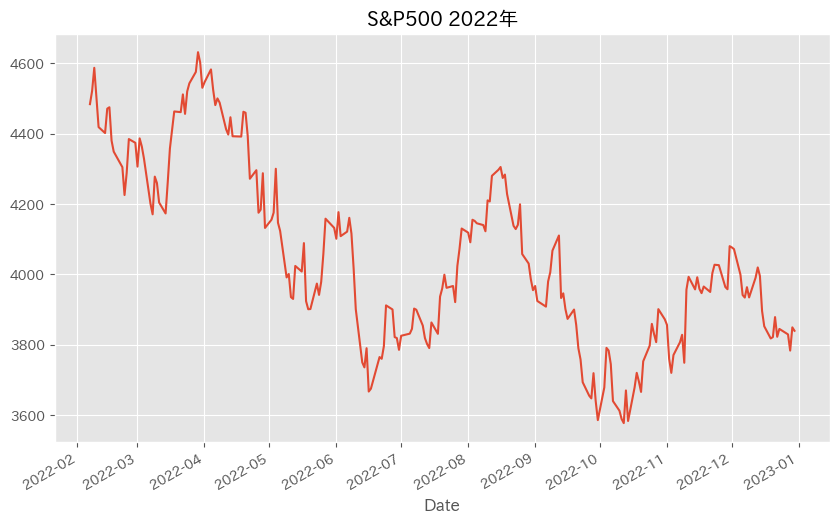

In [77]:
# グラフで確認
%matplotlib inline
from pylab import mpl, plt
import japanize_matplotlib
plt.style.use('ggplot')

sp500_22['Adj Close'].plot(title="S&P500 2022年", figsize=(10, 6))

<Axes: title={'center': 'S&P500 2023年'}, xlabel='Date'>

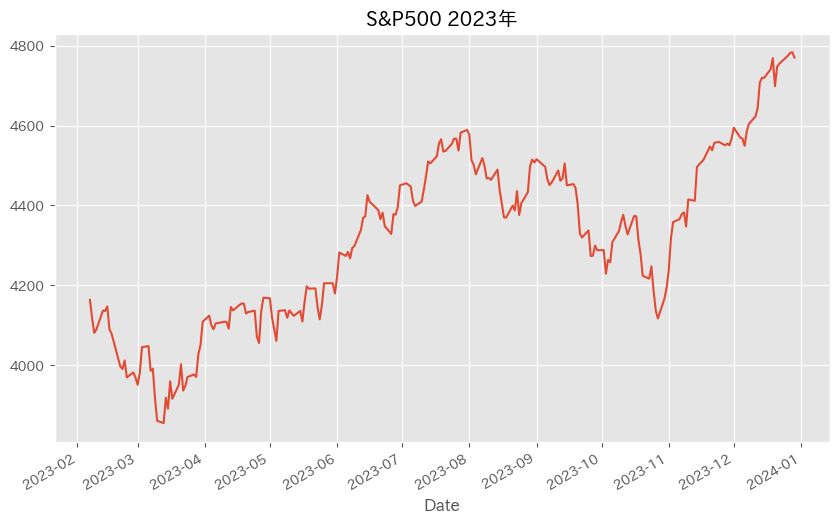

In [78]:
# グラフで確認
sp500_23['Adj Close'].plot(title="S&P500 2023年", figsize=(10, 6))

### 株価のテクニカル分析
 * ここではTalibを使って一番シンプルな単純移動平均線を使った分析をする。
 * Talibはたくさんの分析指標を使用できるライブラリ。メジャーなテクニカル指標はほぼサポートしている。   
https://pypi.org/project/TA-Lib/

In [62]:
# talibをインストールする。
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   5010      0 --:--:-- --:--:-- --:--:--  5066
100   363  100   363    0     0   2484      0 --:--:-- --:--:-- --:--:--  2484
100 1299k  100 1299k    0     0  1007k      0  0:00:01  0:00:01 --:--:-- 2569k
ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/outpu

In [63]:
# talibをインポートする。
import talib
# テーブルに移動平均線の計算結果の行を追加する。
sp500_22["sma_7"] = talib.SMA(sp500_22['Adj Close'].values, 7)
sp500_22["sma_25"] = talib.SMA(sp500_22['Adj Close'].values, 25)

In [64]:
# テーブルに移動平均線の計算結果の行を追加する。
sp500_23["sma_7"] = talib.SMA(sp500_23['Adj Close'].values, 7)
sp500_23["sma_25"] = talib.SMA(sp500_23['Adj Close'].values, 25)

<Axes: title={'center': 'S&P500 2022年 | 7 & 25 日単純移動平均'}, xlabel='Date'>

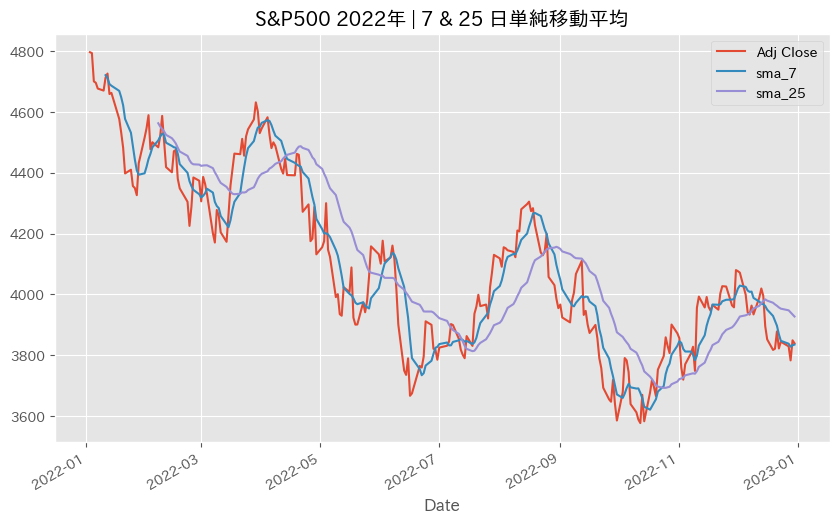

In [65]:
sp500_22[['Adj Close', 'sma_7', 'sma_25']].plot(title="S&P500 2022年 | 7 & 25 日単純移動平均", figsize=(10, 6))

<Axes: title={'center': 'S&P500 2023年 | 7 & 25 日単純移動平均'}, xlabel='Date'>

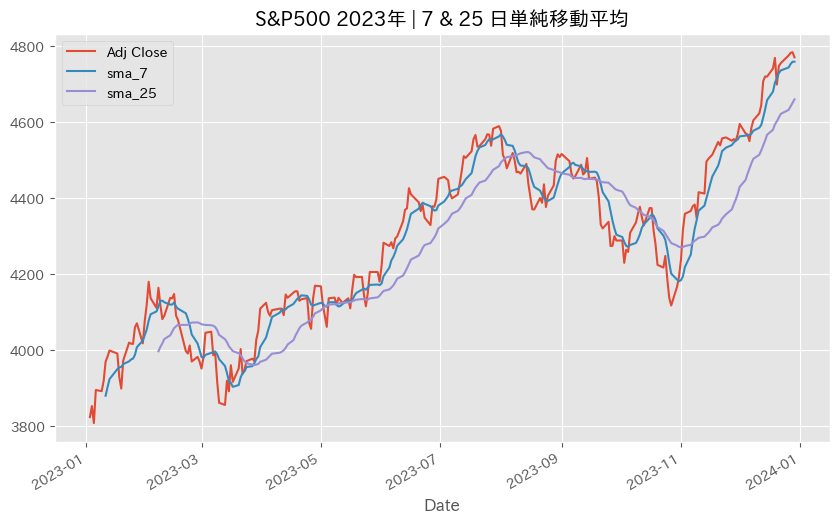

In [66]:
sp500_23[['Adj Close', 'sma_7', 'sma_25']].plot(title="S&P500 2023年 | 7 & 25 日単純移動平均", figsize=(10, 6))

In [67]:
# numpyをインポート
import numpy as np

# ゴールデンクロス、デッドクロスを判定して、position列を追加する。
sp500_22['position'] = np.where(sp500_22['sma_7'] > sp500_22['sma_25'], 1, -1)

# 移動平均なので前半の数日は平均線を生成できない。nanが含まれる行は集計から除外する。
sp500_22.dropna(inplace=True)

sp500_22

,Open,High,Low,Close,Adj Close,Volume,sma_7,sma_25,position
Date,,,,,,,,,
2022-02-07,4505.750000,4521.859863,4471.470215,4483.870117,4483.870117,4228480000,4506.451381,4562.962754,-1
2022-02-08,4480.020020,4531.319824,4465.399902,4521.540039,4521.540039,4459620000,4519.264230,4551.961953,-1
2022-02-09,4547.000000,4590.029785,4547.000000,4587.180176,4587.180176,4524350000,4529.497140,4543.707559,-1
2022-02-10,4553.240234,4588.919922,4484.310059,4504.080078,4504.080078,5314860000,4523.431431,4535.847559,-1
2022-02-11,4506.270020,4526.330078,4401.410156,4418.640137,4418.640137,5251500000,4499.040039,4524.751172,-1
...,...,...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,3847.577148,3953.306807,-1
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,3838.077148,3947.863203,-1
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,3828.199986,3941.194404,-1


In [68]:
# ゴールデンクロス、デッドクロスを判定して、position列を追加する。
sp500_23['position'] = np.where(sp500_23['sma_7'] > sp500_23['sma_25'], 1, -1)

# 移動平均なので前半の数日は平均線を生成できない。nanが含まれる行は集計から除外する。
sp500_23.dropna(inplace=True)

sp500_23

,Open,High,Low,Close,Adj Close,Volume,sma_7,sma_25,position
Date,,,,,,,,,
2023-02-07,4105.350098,4176.540039,4088.389893,4164.000000,4164.000000,4355860000,4114.985700,3996.946416,1
2023-02-08,4153.470215,4156.850098,4111.669922,4117.859863,4117.859863,4029820000,4129.284249,4008.695215,1
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4081.500000,4270200000,4129.984235,4017.836416,1
2023-02-10,4068.919922,4094.360107,4060.790039,4090.459961,4090.459961,3891520000,4125.877093,4029.130811,1
2023-02-13,4096.620117,4138.899902,4092.669922,4137.290039,4137.290039,3448620000,4119.809989,4038.819209,1
...,...,...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,4735.342843,4621.230781,1
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,4743.228585,4631.659980,1
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,4752.141462,4641.027988,1


# テクニカル指標を売買戦略としたバックテスト
 * ベクトル化バックテストを行う。   
 (for文などを使わないバックテストのこと、ループ構文を使わないので処理が速い)
 * バイホールドと移動平均のクロスをもとにポジション変更した場合の累積騰落率を調べる。

 * 注意：簡易バックテストなので以下は考慮しない。あくまで売買戦略の良しあしを判断する参考として見てほしい。
  * 空売り時の保証金および株式のレンタル料
  * 買い付け・売却手数料

 * 対数収益率で集計   
 https://capitalmarket.jp/post-431/

  $価格比率=x2/x1$    
  $対数収益率=log e(価格比率)$

In [69]:
sp500_22['return'] = np.log(sp500_22['Adj Close'] / sp500_22['Adj Close'].shift(1))
sp500_22

,Open,High,Low,Close,Adj Close,Volume,sma_7,sma_25,position,return
Date,,,,,,,,,,
2022-02-07,4505.750000,4521.859863,4471.470215,4483.870117,4483.870117,4228480000,4506.451381,4562.962754,-1,NaN
2022-02-08,4480.020020,4531.319824,4465.399902,4521.540039,4521.540039,4459620000,4519.264230,4551.961953,-1,0.008366
2022-02-09,4547.000000,4590.029785,4547.000000,4587.180176,4587.180176,4524350000,4529.497140,4543.707559,-1,0.014413
2022-02-10,4553.240234,4588.919922,4484.310059,4504.080078,4504.080078,5314860000,4523.431431,4535.847559,-1,-0.018282
2022-02-11,4506.270020,4526.330078,4401.410156,4418.640137,4418.640137,5251500000,4499.040039,4524.751172,-1,-0.019152
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000,3847.577148,3953.306807,-1,0.005851
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000,3838.077148,3947.863203,-1,-0.004058
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000,3828.199986,3941.194404,-1,-0.012093


In [70]:
sp500_23['return'] = np.log(sp500_23['Adj Close'] / sp500_23['Adj Close'].shift(1))
sp500_23

,Open,High,Low,Close,Adj Close,Volume,sma_7,sma_25,position,return
Date,,,,,,,,,,
2023-02-07,4105.350098,4176.540039,4088.389893,4164.000000,4164.000000,4355860000,4114.985700,3996.946416,1,NaN
2023-02-08,4153.470215,4156.850098,4111.669922,4117.859863,4117.859863,4029820000,4129.284249,4008.695215,1,-0.011143
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4081.500000,4270200000,4129.984235,4017.836416,1,-0.008869
2023-02-10,4068.919922,4094.360107,4060.790039,4090.459961,4090.459961,3891520000,4125.877093,4029.130811,1,0.002193
2023-02-13,4096.620117,4138.899902,4092.669922,4137.290039,4137.290039,3448620000,4119.809989,4038.819209,1,0.011384
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,4735.342843,4621.230781,1,0.001659
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,4743.228585,4631.659980,1,0.004223
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,4752.141462,4641.027988,1,0.001429


In [71]:
sp500_22['strategy'] = sp500_22['position'].shift(1) * sp500_22['return']

In [72]:
sp500_23['strategy'] = sp500_23['position'].shift(1) * sp500_23['return']

In [73]:
sp500_22[['return', 'strategy']].sum().apply(np.exp)

return      0.856292
strategy    1.140530
dtype: float64

In [74]:
sp500_23[['return', 'strategy']].sum().apply(np.exp)

return      1.145492
strategy    1.006958
dtype: float64

,return,strategy
Date,,
2022-02-07,NaN,NaN
2022-02-08,0.008366,-0.008366
2022-02-09,0.022779,-0.022779
2022-02-10,0.004497,-0.004497
2022-02-11,-0.014655,0.014655
...,...,...
2022-12-23,-0.153760,0.130108
2022-12-27,-0.157818,0.134166
2022-12-28,-0.169911,0.146259


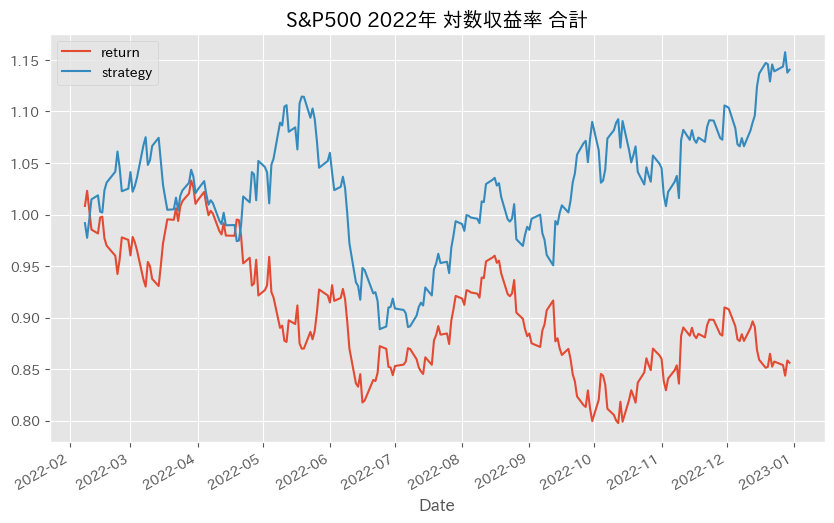

In [75]:
sp500_22[['return', 'strategy']].cumsum().apply(np.exp).plot(title="S&P500 2022年 対数収益率 合計",figsize=(10, 6))
sp500_22[['return', 'strategy']].cumsum()

,return,strategy
Date,,
2023-02-07,NaN,NaN
2023-02-08,-0.011143,-0.011143
2023-02-09,-0.020012,-0.020012
2023-02-10,-0.017819,-0.017819
2023-02-13,-0.006435,-0.006435
...,...,...
2023-12-22,0.132643,0.003742
2023-12-26,0.136865,0.007965
2023-12-27,0.138295,0.009395


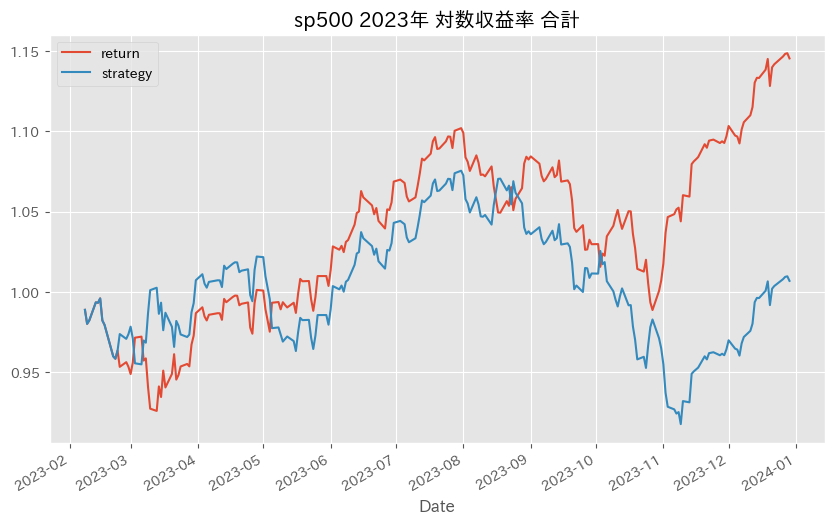

In [76]:
sp500_23[['return', 'strategy']].cumsum().apply(np.exp).plot(title="sp500 2023年 対数収益率 合計",figsize=(10, 6))
sp500_23[['return', 'strategy']].cumsum()